In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
state_of_state = ({
    'Year': [2018,2019,2020,2021],
    'Actual_Revenue_in_billions': [107,108,99,90],
    'Actual_Expenditure_in_billions': [105,96,94,93]
    
})

df = pd.DataFrame(state_of_state)
df

,Year,Actual_Revenue_in_billions,Actual_Expenditure_in_billions
0,2018,107,105
1,2019,108,96
2,2020,99,94
3,2021,90,93


In [4]:
df.isnull()

,Year,Actual_Revenue_in_billions,Actual_Expenditure_in_billions
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [5]:
df.corr()

,Year,Actual_Revenue_in_billions,Actual_Expenditure_in_billions
Year,1.000000,-0.925820,-0.895669
Actual_Revenue_in_billions,-0.925820,1.000000,0.661928
Actual_Expenditure_in_billions,-0.895669,0.661928,1.000000


In [6]:
from scipy.stats import shapiro, normaltest

In [7]:
# Checking normality assumption for revenue variable
statistic, p_value = shapiro(df['Actual_Revenue_in_billions'])
alpha = 0.05

print(f"Shapiro-Wilk Test - Actual Revenue: Statistic ={statistic}, p-value = {p_value}")
if p_value > alpha:
    print("Actual Revenue in billions is normally distributed (parametric)")
else:    
    print("Actual Revenue is not normally distributed (non-parametric)")
    
# Checking normality assumption for expenditure variable

statistic, p_value = shapiro(df['Actual_Expenditure_in_billions'])

print(f"Shapiro-Wilk Test - Actual Expenditure: Statistic = {statistic}, p-value = {p_value}")
if p_value > alpha:
     print("Actual Expenditure in billions is normally distributed (parametric)")
else:    
    print("Actual Expenditure is not normally distributed (non-parametric)")
    



Shapiro-Wilk Test - Actual Revenue: Statistic =0.8939509391784668, p-value = 0.40163812041282654
Actual Revenue in billions is normally distributed (parametric)
Shapiro-Wilk Test - Actual Expenditure: Statistic = 0.8179303407669067, p-value = 0.1384580284357071
Actual Expenditure in billions is normally distributed (parametric)


#To check the normallity assumption for the variables. If the p-value is graeter than the significance level(e.g.,alpha =0.05),is is considered the variable to be normally distributed and suitable for parametric tests. Conversely, if the p-value is less than or equall to the significance level,the variable is considered non-normally distributed and may require non parametric tests.

In [8]:
from scipy.stats import f_oneway, kruskal, pearsonr, spearmanr, ttest_rel, wilcoxon

In [9]:
#For parametric test
f_statistic, p_value = f_oneway(df['Actual_Revenue_in_billions'][df['Year'] == 2018],
                               df['Actual_Revenue_in_billions'][df['Year'] == 2019],
                               df['Actual_Revenue_in_billions'][df['Year'] == 2020],
                               df['Actual_Revenue_in_billions'][df['Year'] == 2021])
print(f"ANOVA - F-Statistic: {f_statistic}, p-value: {p_value}")

#Non parametric test
h_statistic, p_value = kruskal(df['Actual_Revenue_in_billions'][df['Year'] == 2018],
                              df['Actual_Revenue_in_billions'][df['Year'] == 2019],
                              df['Actual_Revenue_in_billions'][df['Year'] == 2020],
                              df['Actual_Revenue_in_billions'][df['Year'] == 2021])
print(f"Kruskal-Wallis - H-Statistic: {h_statistic}, p-value: {p_value}")

# Hypothesis 2: Positive correlation between revenue and expenditure
# pearson's correlation (parametric) test
pearson_corr, p_value = pearsonr(df['Actual_Revenue_in_billions'], df['Actual_Expenditure_in_billions'])
print(f"Pearson's Correlation: {pearson_corr}, p-value: {p_value}")

# Spearman's rank correlation (non parametric) test

spearman_corr, p_value = spearmanr(df['Actual_Revenue_in_billions'], df['Actual_Expenditure_in_billions'])
print(f"Spearman's Correlation: {spearman_corr}, p-value: {p_value}")

ANOVA - F-Statistic: nan, p-value: nan
Kruskal-Wallis - H-Statistic: 3.0, p-value: 0.3916251762710877
Pearson's Correlation: 0.6619276003825103, p-value: 0.3380723996174897
Spearman's Correlation: 0.7999999999999999, p-value: 0.20000000000000007


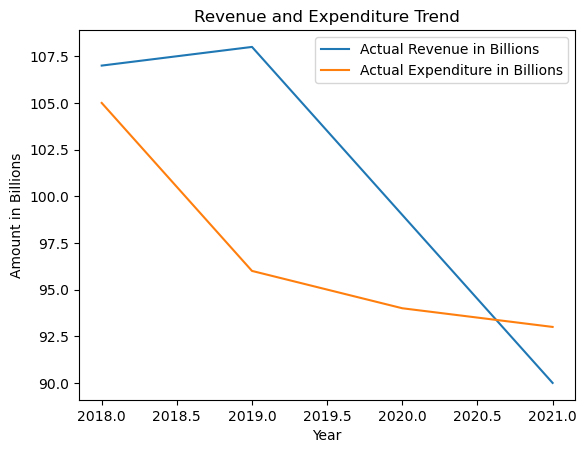

In [10]:
# Trend analysis

plt.plot(df['Year'], df['Actual_Revenue_in_billions'], label = 'Actual Revenue in Billions')
plt.plot(df['Year'], df['Actual_Expenditure_in_billions'], label = 'Actual Expenditure in Billions')
plt.xlabel('Year')
plt.ylabel('Amount in Billions')
plt.title('Revenue and Expenditure Trend')
plt.legend()
plt.show()

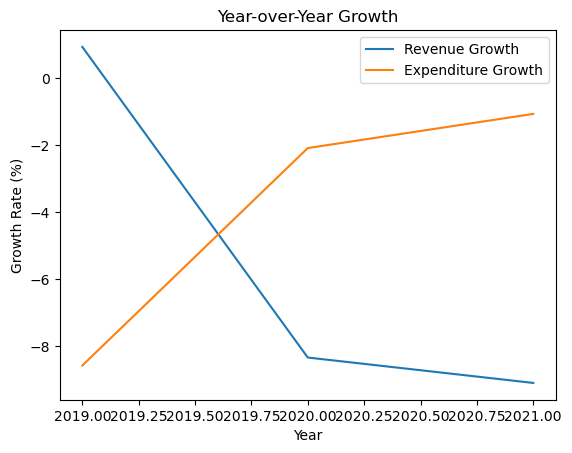

In [11]:
# Year over Year Growth

df['Revenue_Growth'] = df['Actual_Revenue_in_billions'].pct_change() * 100
df['Expenditure_Growth'] = df['Actual_Expenditure_in_billions'].pct_change() * 100
growth_data = df.dropna()
plt.plot(growth_data['Year'], growth_data['Revenue_Growth'], label = 'Revenue Growth')
plt.plot(growth_data['Year'], growth_data['Expenditure_Growth'], label = 'Expenditure Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Year-over-Year Growth')
plt.legend()
plt.show()

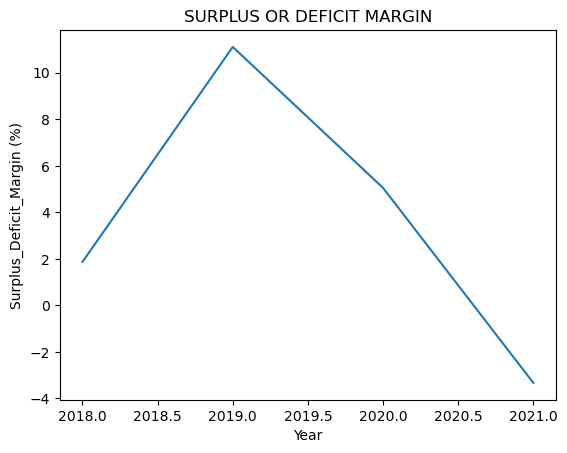

In [12]:
# Surplus or Deficit Analysis

df['Surplus_Deficit'] = df['Actual_Revenue_in_billions'] - df['Actual_Expenditure_in_billions']
df['Surplus_Deficit_Margin'] = (df['Surplus_Deficit'] / df['Actual_Revenue_in_billions']) * 100
plt.plot(df['Year'], df['Surplus_Deficit_Margin'])
plt.xlabel('Year')
plt.ylabel('Surplus_Deficit_Margin (%)')
plt.title('SURPLUS OR DEFICIT MARGIN')
plt.show()

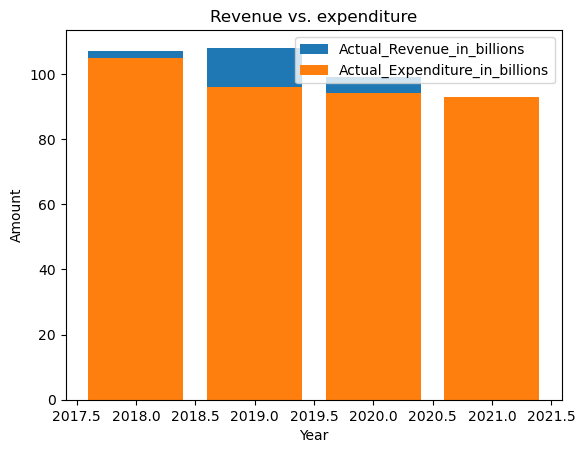

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


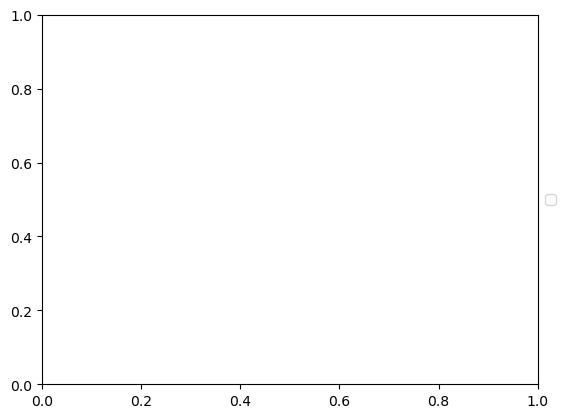

In [13]:
# Comparative Analysis

plt.bar(df['Year'], df['Actual_Revenue_in_billions'], label = 'Actual_Revenue_in_billions')
plt.bar(df['Year'], df['Actual_Expenditure_in_billions'], label = 'Actual_Expenditure_in_billions')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Revenue vs. expenditure')
plt.legend()
plt.show()
plt.legend(loc = "center left", bbox_to_anchor = (1.0,0.5))

In [14]:
#Forcasting using linear regression

from sklearn.linear_model import LinearRegression

In [15]:
X = df['Year'].values.reshape(-1, 1)
y = df['Actual_Revenue_in_billions'].values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

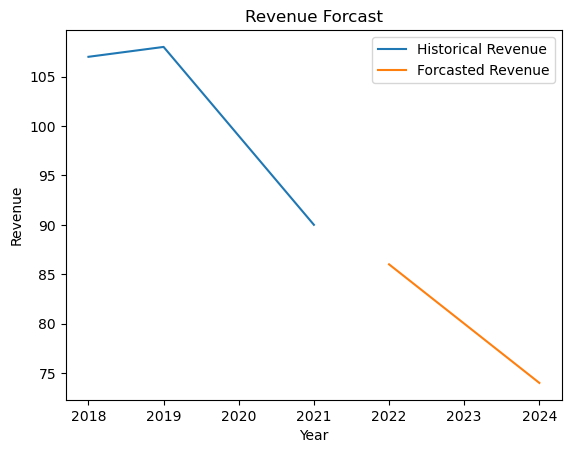

In [16]:
future_years = [2022,2023,2024]
future_revenue = model.predict([[year] for year in future_years])

plt.plot(df['Year'], df['Actual_Revenue_in_billions'] , label = 'Historical Revenue')
plt.plot(future_years, future_revenue, label = 'Forcasted Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Forcast')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

actual_values = np.array([105,100,95,90])
predicted_values = np.array([85,80,75,70])

r2 = r2_score(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared = False)

print(f"R-Squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error(RMSE): {rmse}")

R-Squared: -11.8
Mean Squared Error (MSE): 400.0
Root Mean Squared Error(RMSE): 20.0


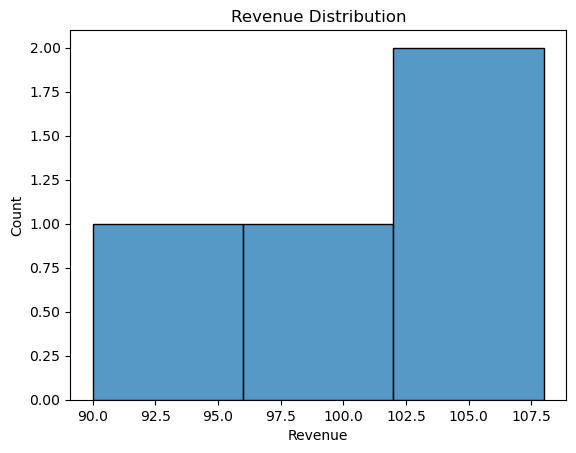

In [18]:
# univariate analysis

sns.histplot(df['Actual_Revenue_in_billions'])
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue Distribution')
plt.show()

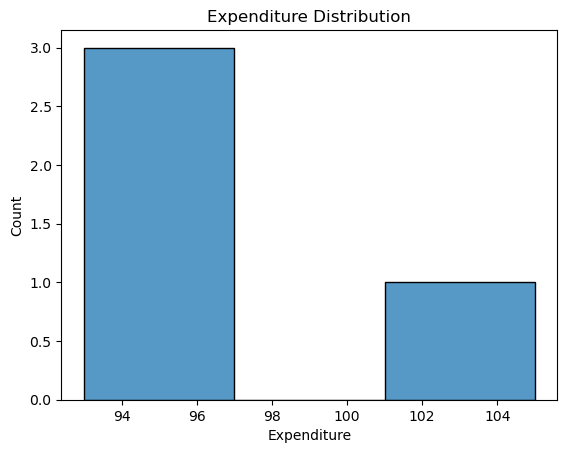

In [19]:
sns.histplot(df['Actual_Expenditure_in_billions'])
plt.xlabel('Expenditure')
plt.ylabel('Count')
plt.title('Expenditure Distribution')
plt.show()

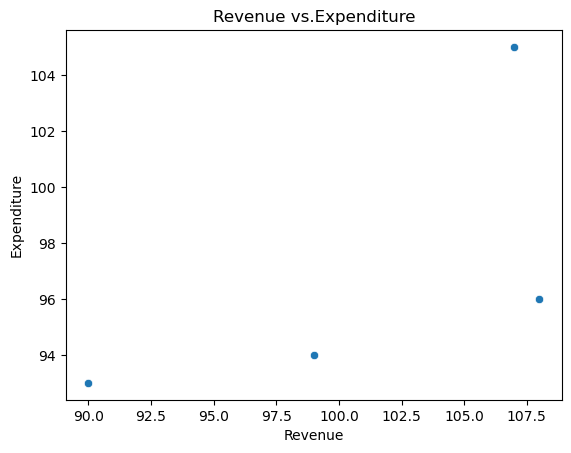

In [20]:
# Univariate Analysis
sns.scatterplot(data=df, x = 'Actual_Revenue_in_billions', y= 'Actual_Expenditure_in_billions')
plt.xlabel('Revenue')
plt.ylabel('Expenditure')
plt.title('Revenue vs.Expenditure')
plt.show()

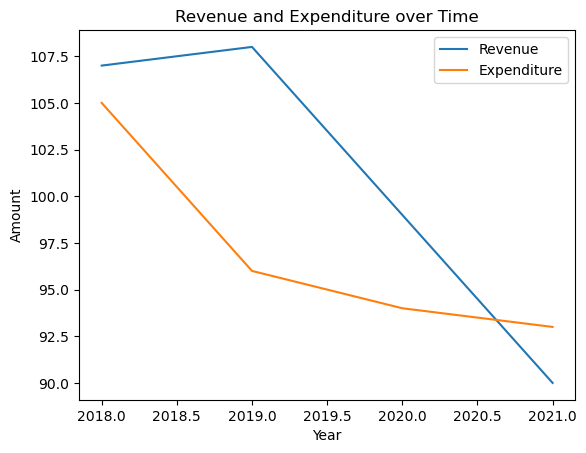

In [21]:
sns.lineplot(data = df, x = 'Year', y = 'Actual_Revenue_in_billions', label = 'Revenue')
sns.lineplot(data = df, x = 'Year', y = 'Actual_Expenditure_in_billions', label = 'Expenditure')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Revenue and Expenditure over Time')
plt.legend()
plt.show()

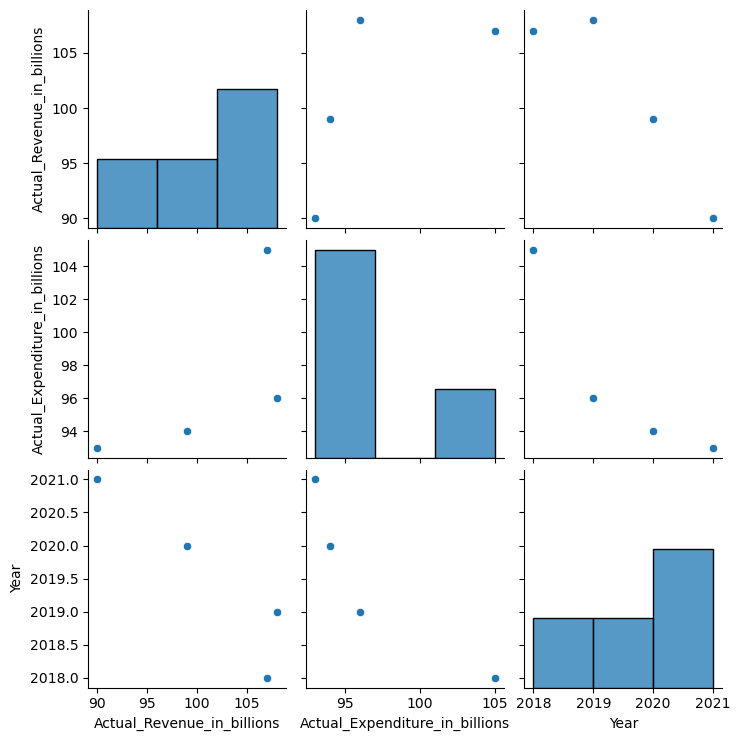

In [22]:
# Multivariate Analysis

sns.pairplot(data = df[['Actual_Revenue_in_billions', 'Actual_Expenditure_in_billions', 'Year']])
plt.show()

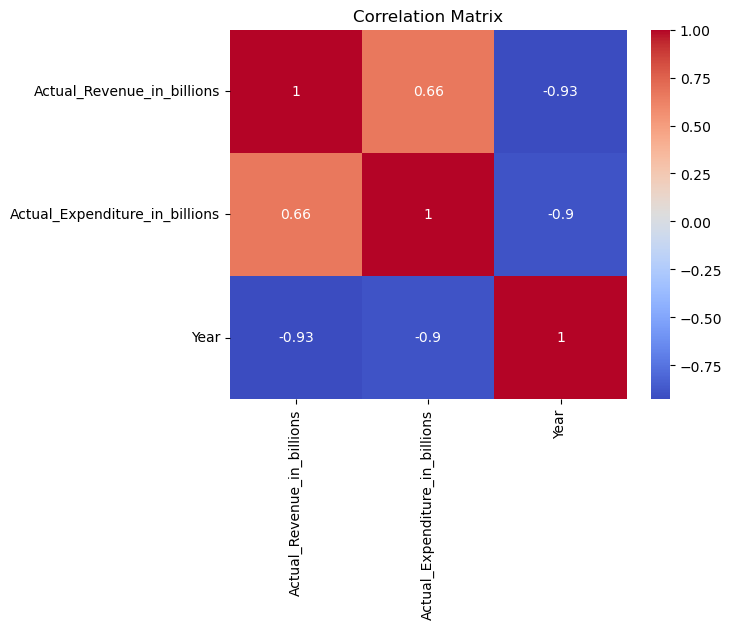

In [23]:
correlation_matrix = df[['Actual_Revenue_in_billions', 'Actual_Expenditure_in_billions', 'Year']].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()